In [2]:
!pip install pandas seaborn matplotlib

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
       300000., 350000.]), [Text(-50000.0, 0, '−50000'), Text(0.0, 0, '0'), Text(50000.0, 0, '50000'), Text(100000.0, 0, '100000'), Text(150000.0, 0, '150000'), Text(200000.0, 0, '200000'), Text(250000.0, 0, '250000'), Text(300000.0, 0, '300000'), Text(350000.0, 0, '350000')])


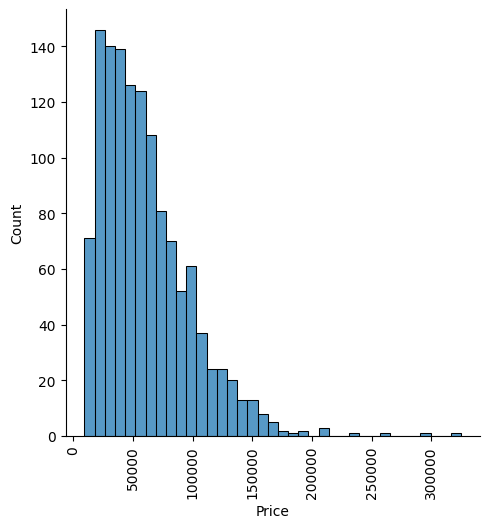

In [3]:

import pandas as pd
import seaborn as sns
import matplotlib as plt


df = pd.read_csv("laptop.csv")

df.drop(columns=["Unnamed: 0"], inplace=True)




df.drop_duplicates(inplace=True)
# print(df.duplicated().sum())

describe = df.describe()

displot = sns.displot(df["Price"]) # type: ignore

company_price = df[["Company","Price"]].groupby("Company").mean().reset_index().sort_values(by="Price", ascending=False)

# print(df[["Company","Price"]].groupby("Company").mean().reset_index())

# sns.barplot(x="Company", y="Price", data=company_price)

print(plt.pyplot.xticks(rotation=90)) # type: ignore

# print(df[["Company"]].value_counts())

df["Ram"] = df["Ram"].apply(lambda x: x[:-2])
df["Weight"] = (df["Weight"].apply(lambda x: x[:-2]))




In [4]:
df[["Ram","Weight","Price"]].corr()

,Ram,Weight,Price
Ram,1.000000,0.389658,0.740106
Weight,0.389658,1.000000,0.212192
Price,0.740106,0.212192,1.000000


<Axes: xlabel='Weight', ylabel='Price'>

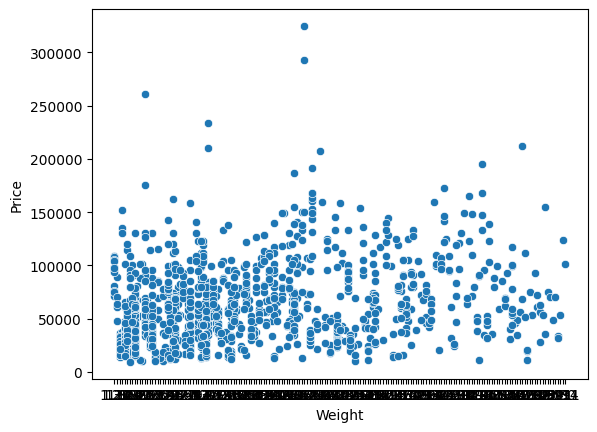

In [5]:
sns.scatterplot(x="Weight", y="Price", data=df[["Ram","Weight","Price"]])

In [6]:
ram_data = df[["Ram","Price"]].groupby("Ram").mean().reset_index().sort_values(by="Price", ascending=False)

<Axes: xlabel='Ram', ylabel='Price'>

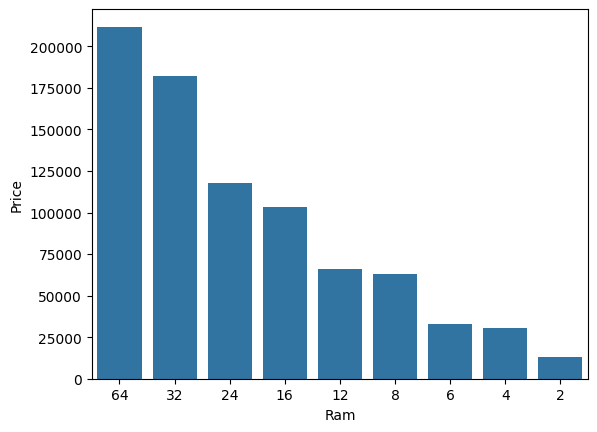

In [7]:
sns.barplot(x="Ram", y="Price", data=ram_data)

In [8]:
df["ScreenResolution"].value_counts()

ScreenResolution
Full HD 1920x1080                                505
1366x768                                         262
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Quad HD+ / Touchscr

In [9]:
def fetch_screen_type(value):
    if "Touchscreen" in value:
        return "Touchscreen"
    elif "IPS" in value:
        return "IPS"
    else:
        return "Others"

In [10]:
df["screen"] = df["ScreenResolution"].apply(fetch_screen_type)
df["screen"].value_counts()

screen
Others         810
IPS            276
Touchscreen    188
Name: count, dtype: int64

In [11]:
df[["screen","Price"]].groupby("screen").mean().reset_index()

,screen,Price
0,IPS,76730.919809
1,Others,51046.868124
2,Touchscreen,77422.131574


In [12]:
def fetch_screen_size(value):
    return value.split(" ")[-1]

df["screen_size"] = df["ScreenResolution"].apply(fetch_screen_size)
df["screen_size"].value_counts()

# df[["screen_size","Price"]].groupby("screen_size").mean().reset_index()


screen_size
1920x1080    833
1366x768     289
3840x2160     43
3200x1800     25
2560x1440     23
1600x900      23
2560x1600      6
2304x1440      6
2256x1504      6
1920x1200      5
1440x900       4
2880x1800      4
2400x1600      4
2160x1440      2
2736x1824      1
Name: count, dtype: int64

In [13]:
df["x_size"] = df["screen_size"].apply(lambda x: x.split("x")[0])
df["y_size"] = df["screen_size"].apply(lambda x: x.split("x")[1])

In [14]:
df["diagonal_pixels"] = ((df["x_size"].astype(int) ** 2 + df["y_size"].astype(int) ** 2) ** 0.5)


In [15]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,screen,screen_size,x_size,y_size,diagonal_pixels
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,IPS,2560x1600,2560,1600,3018.873962
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Others,1440x900,1440,900,1698.116604
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Others,1920x1080,1920,1080,2202.907170
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,IPS,2880x1800,2880,1800,3396.233208
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,IPS,2560x1600,2560,1600,3018.873962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2,38378.6496,Others,1366x768,1366,768,1567.092850
1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8,33992.6400,Touchscreen,1920x1080,1920,1080,2202.907170
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3,79866.7200,Touchscreen,3200x1800,3200,1800,3671.511950
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5,12201.1200,Others,1366x768,1366,768,1567.092850


In [16]:
df["ppi"] = df["diagonal_pixels"] / df["Inches"]

df["Inches"] = df["diagonal_pixels"] / df["ppi"]

df[["Inches","diagonal_pixels","ppi","Price"]].corr()

,Inches,diagonal_pixels,ppi,Price
Inches,1.000000,-0.074402,-0.414395,0.066990
diagonal_pixels,-0.074402,1.000000,0.933337,0.551676
ppi,-0.414395,0.933337,1.000000,0.469539
Price,0.066990,0.551676,0.469539,1.000000


<Axes: xlabel='ppi', ylabel='Price'>

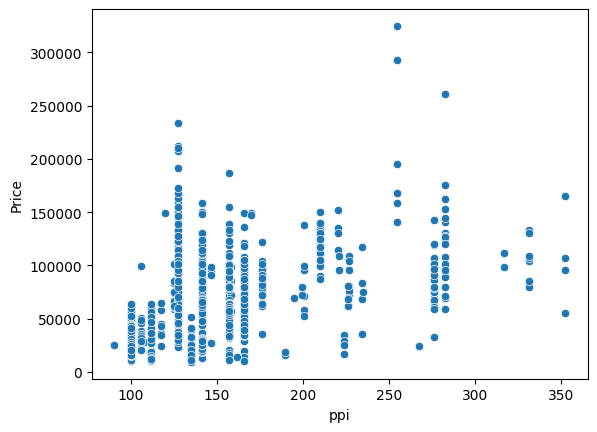

In [17]:
sns.scatterplot(x="ppi", y="Price", data=df)

<Axes: xlabel='ppi', ylabel='Price'>

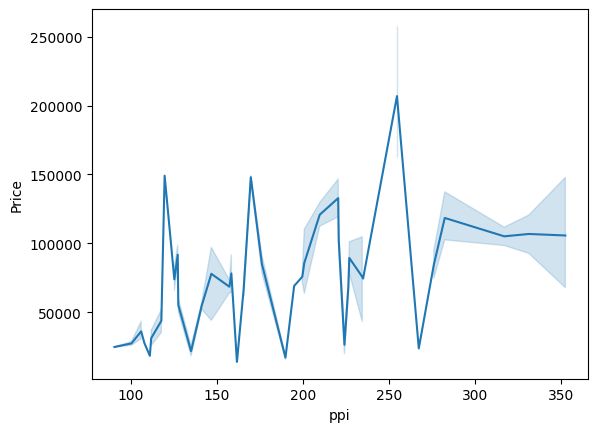

In [18]:
sns.lineplot(x="ppi", y="Price", data=df)


In [19]:
df["OpSys"].value_counts()


OpSys
Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [20]:
def fetch_os(value):
    if "windows" in value.lower():
        return "Windows"
    elif "mac" in value.lower():
        return "MacOS"
    elif "linux" in value.lower():
        return "Linux"
    else:
        return "Others"

df["OS"] = df["OpSys"].apply(fetch_os)

df[["OS","Price"]].groupby("OS").mean().reset_index().sort_values(by="Price", ascending=False)

,OS,Price
1,MacOS,83340.499886
3,Windows,64089.981622
0,Linux,33133.077434
2,Others,30633.779065


In [21]:
df["Memory"].value_counts()

Memory
256GB SSD                        412
1TB HDD                          215
500GB HDD                        123
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                36
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [22]:
df["Memory"].value_counts()

Memory
256GB SSD                        412
1TB HDD                          215
500GB HDD                        123
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                36
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         